<a href="https://colab.research.google.com/github/amomen1218/python-for-remote-sensing/blob/main/grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import modules
!pip install geoplot
!pip install rasterio
import geopandas as gpd
import geoplot as gplt
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio
from rasterio.transform import Affine
from scipy import stats
from shapely.geometry import Polygon, box
from sklearn.datasets import fetch_species_distributions
from sklearn.neighbors import KernelDensity
import pyproj
from shapely.geometry import MultiPolygon

In [ ]:
# Load data

# County boundaries
# Source: https://opendata.mtc.ca.gov/datasets/san-francisco-bay-region-counties-clipped?geometry=-125.590%2C37.123%2C-119.152%2C38.640
counties = gpd.read_file("../_static/e_vector_shapefiles/sf_bay_counties/sf_bay_counties.shp")

# Well locations
# Source: https://gis.data.ca.gov/datasets/3a3e681b894644a9a95f9815aeeeb57f_0?geometry=-123.143%2C36.405%2C-119.230%2C37.175
# Modified by author so that only the well locations within the counties and the surrounding 50 km were kept
wells = gpd.read_file("../_static/e_vector_shapefiles/sf_bay_wells_50km/sf_bay_wells_50km.shp")

# Reproject data to NAD83(HARN) / California Zone 3
# https://spatialreference.org/ref/epsg/2768/
proj = 2768
counties = counties.to_crs(proj)
wells = wells.to_crs(proj)

# Create a column that assigns each well a number
wells["Well_ID"] = np.arange(wells.shape[0])

DataSourceError: ../_static/e_vector_shapefiles/sf_bay_counties/sf_bay_counties.shp: No such file or directory

      TYPE Division District     Upazila      FType  \
0      335  Barisal  Barisal  Banaripara  Tank/pond   
1      335  Barisal  Barisal  Banaripara  Tank/pond   
2      335  Barisal  Barisal  Banaripara  Tank/pond   
3      335  Barisal  Barisal  Banaripara  Tank/pond   
4      335  Barisal  Barisal  Banaripara  Tank/pond   
...    ...      ...      ...         ...        ...   
6537   335   Sylhet   Sylhet    Zakiganj  Tank/pond   
6538   335   Sylhet   Sylhet    Zakiganj  Tank/pond   
6539   335   Sylhet   Sylhet    Zakiganj  Tank/pond   
6540   335   Sylhet   Sylhet    Zakiganj  Tank/pond   
6541   335   Sylhet   Sylhet    Zakiganj  Tank/pond   

                            geometry  Well_ID  
0     POINT (519009.866 2520199.897)        0  
1     POINT (521012.269 2519670.397)        1  
2     POINT (520642.587 2520012.964)        2  
3     POINT (515276.394 2518004.716)        3  
4     POINT (514174.427 2523108.234)        4  
...                              ...      ...  
653

<Axes: >

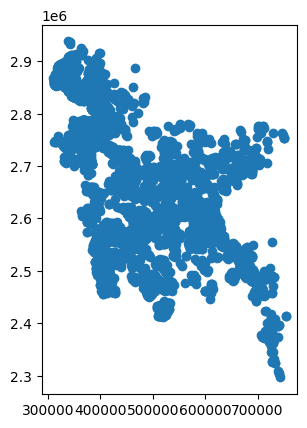

In [ ]:
print(wells)
print(counties)
wells.plot()

In [ ]:
# Set side length for cells in grid
# This is dependent on projection chosen as length is in units specified in projection
side_length = 5000

# Set shape of grid
shape = "hexagon"
# shape = "rectangle"

<ipython-input-32-bf7679072a22>:7: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  feature = feature.buffer(20)


Text(0.5, 1.0, 'San Francisco Bay Area - Boundaries, Wells, and Grids')

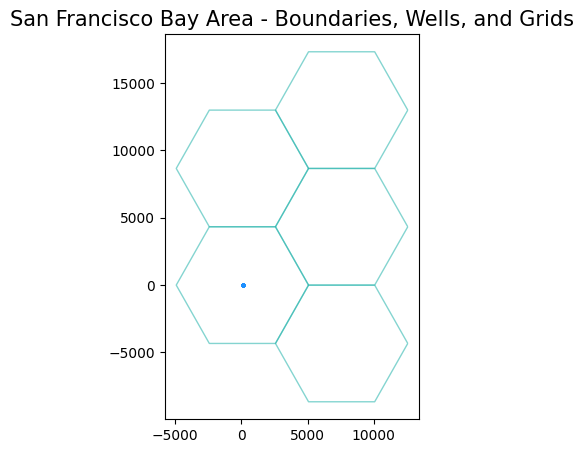

In [ ]:
# Create grid
bay_area_grid = create_grid(feature = wells, shape = shape, side_length = side_length)

# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (5, 5))

# Plot data
counties.plot(ax = ax, color = 'bisque', edgecolor = 'dimgray')
wells.plot(ax = ax, marker = 'o', color = 'dodgerblue', markersize = 3)
bay_area_grid.plot(ax = ax, color = 'none', edgecolor = 'lightseagreen', alpha = 0.55)

# Set title
ax.set_title('San Francisco Bay Area - Boundaries, Wells, and Grids', fontdict = {'fontsize': '15', 'fontweight' : '3'})